# Estimating Treatment Effects (Causality)

## Randomized Control Trials

In [1]:
n <- 50
set.seed(31255)
treat <- 1*(runif(n)<0.5) #generate treatment randomly. treat=1 if received treatment

effect <- 2
y <- effect*treat + rnorm(n) #generate outcome based on treatment

mean(y[treat==1])-mean(y[treat==0])

[1] 2.131468

The difference in response, conditional on treatment, provides an estimate of the treatment effect.

We can get the same answer by running the regression

In [2]:
lm.fit = lm(y~treat)
summary(lm.fit)


Call:
lm(formula = y ~ treat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9238 -0.7266  0.2067  0.8074  2.4400 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.2153     0.2466  -0.873    0.387    
treat         2.1315     0.3237   6.584  3.2e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.13 on 48 degrees of freedom
Multiple R-squared:  0.4745,	Adjusted R-squared:  0.4636 
F-statistic: 43.35 on 1 and 48 DF,  p-value: 3.197e-08


### With Covariates

Suppose there are other observables that were also related to the response. We can use them to get more accurate estimates of the treatment effect

Suppose this was the true model
$$Y=\alpha + \tau W +X + \epsilon$$

but we only estimated the treatment from the difference in the conditional means

In [3]:
n <- 1000
set.seed(31255)
x <- rnorm(n)
treat <- 1*(runif(n)<0.5)
y <- x + effect*treat + rnorm(n)

In [4]:
mean(y[treat==1])-mean(y[treat==0])

[1] 1.972192

The estimate of the treatment effect now has a larger variance. This is because the variation in $X$, which is unrelated to the treatment, adds variation in $Y$.

To see that the variance is larger, consider the regression below where we drop $X$ (so its variation is now in the error term)

\begin{align}Y&=\alpha + \tau W + (X + \epsilon)\\
&=\alpha + \tau W + \tilde\epsilon \end{align}

where $\tilde\epsilon$ now has larger variance than $\epsilon$.

In [5]:
lm.fit = lm(y~treat)
summary(lm.fit)


Call:
lm(formula = y ~ treat)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2550 -0.9950 -0.0465  0.9811  6.0125 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.01598    0.06624   0.241    0.809    
treat        1.97219    0.09340  21.115   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.477 on 998 degrees of freedom
Multiple R-squared:  0.3088,	Adjusted R-squared:  0.3081 
F-statistic: 445.8 on 1 and 998 DF,  p-value: < 2.2e-16


If we run this regression (thus ignoring our observations of the predictor $X$), it is still unbiased *because treatment is* **independent** of the other predictors (it is assigned randomly by the experimenter). This means that omitted variables bias is not an issue.

However, it is a noisy estimate because the predictor ($X$) varies over all observations. The standard error on treat is 0.093

To address this, we can just include the predictor $x$ in the regression. This achieves a less noisy estimate of the treatment effect.

In [6]:
lm.fit2 = lm(y~treat + x)
summary(lm.fit2)


Call:
lm(formula = y ~ treat + x)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3747 -0.7069 -0.0214  0.7102  3.2347 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.01312    0.04475   0.293    0.769    
treat        1.94151    0.06310  30.769   <2e-16 ***
x            1.05836    0.03068  34.498   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9976 on 997 degrees of freedom
Multiple R-squared:  0.6849,	Adjusted R-squared:  0.6843 
F-statistic:  1084 on 2 and 997 DF,  p-value: < 2.2e-16


Notice that the standard error on treatment has decreased from 0.093 to 0.063!

## When Treatment Isn't Random

What if treatment is not assigned independently to each observation? (the treatment isn't completely random)

In [33]:
n <- 2000
set.seed(31255)
x <- rnorm(n)
treat <- (x+2*rnorm(n))>0 #observations with large X are more likely to get treatment
y <- x + effect*treat + rnorm(n)

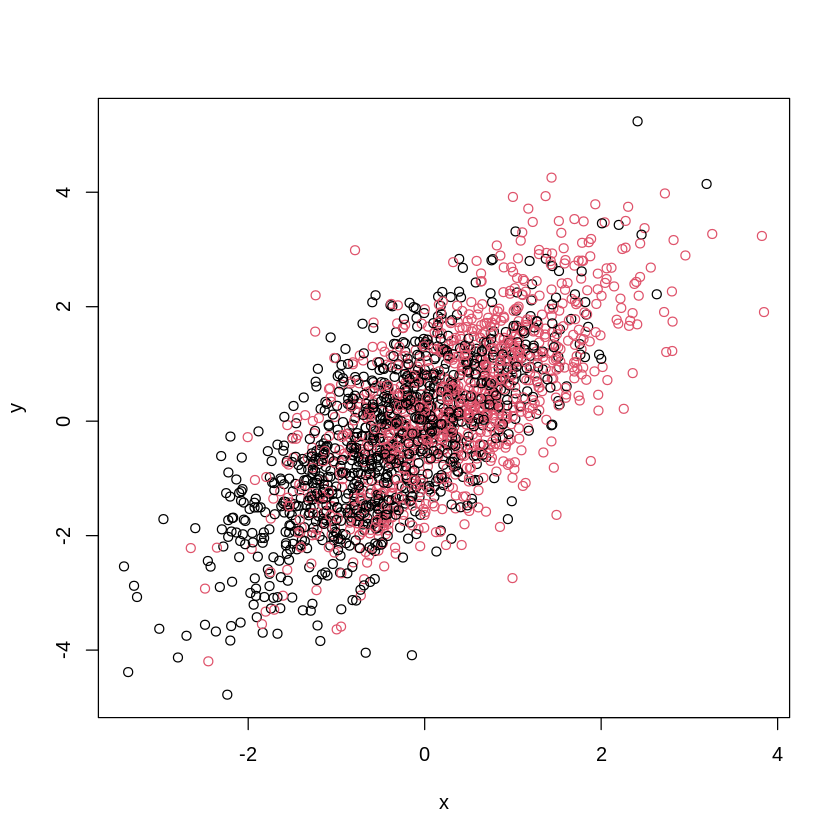

In [31]:
plot(x,y,col=treat+1)


If we estimate the base model for a treatment effect, our estimate is highly biased!

In [32]:
lm.fit = lm(y~treat)
summary(lm.fit)


Call:
lm(formula = y ~ treat)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5088 -0.9303 -0.0182  0.9453  5.6224 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.38383    0.04371  -8.782   <2e-16 ***
treatTRUE    0.69693    0.06114  11.398   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.367 on 1998 degrees of freedom
Multiple R-squared:  0.06105,	Adjusted R-squared:  0.06058 
F-statistic: 129.9 on 1 and 1998 DF,  p-value: < 2.2e-16


The estimated treatment effect is now 3.11, which is pretty far from its true value of 2! If we repeated this on many samples, the average estimate would not be 2. This means it is biased.

To see why this mattters, let's repeat but this time there is no actual effect.


Call:
lm(formula = y ~ treat)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5088 -0.9303 -0.0182  0.9453  5.6224 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.38383    0.04371  -8.782   <2e-16 ***
treatTRUE    0.69693    0.06114  11.398   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.367 on 1998 degrees of freedom
Multiple R-squared:  0.06105,	Adjusted R-squared:  0.06058 
F-statistic: 129.9 on 1 and 1998 DF,  p-value: < 2.2e-16


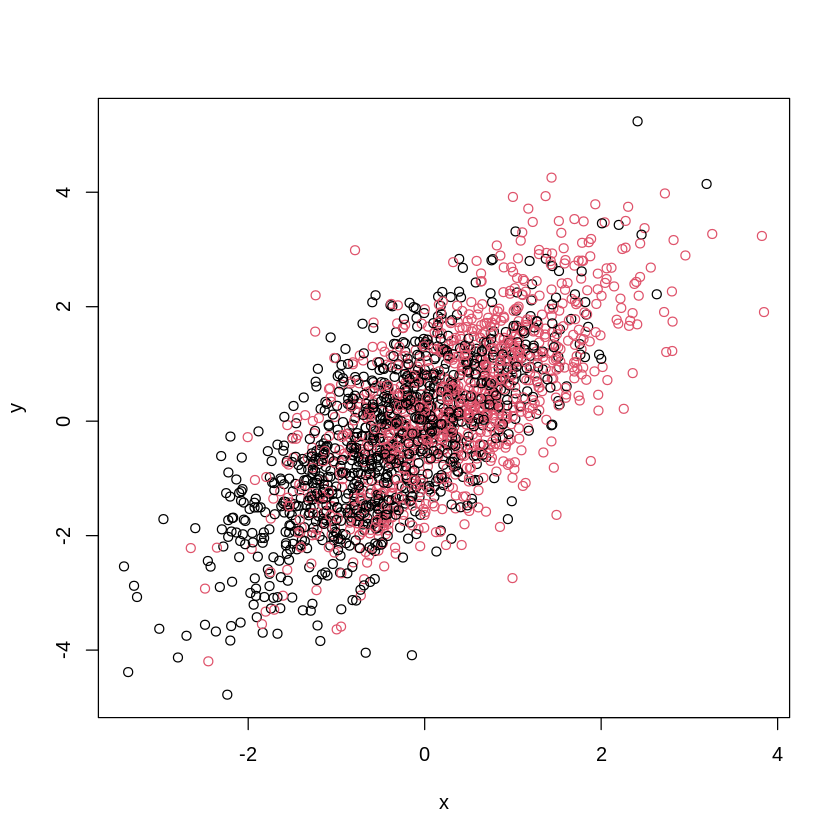

In [35]:
n <- 2000
set.seed(31255)
effect <- 0
x <- rnorm(n)
treat <- (x+2*rnorm(n))>0 #observations with large X are more likely to get treatment
y <- x + effect*treat + rnorm(n)

plot(x,y,col=treat+1)

lm.fit = lm(y~treat)
summary(lm.fit)

We would actually conclude that the treatment has an effect!

**This is what is known as a "selection effect".** Some observations (say, consumers) might be more likely than others to receive treatment (say, view an ad) becuase of their characteristics. If we ignore those characteristics, we will mis-estimate the effect of the treatment.

This is because we can't assume that the only difference between the two groups is that one received treatment and one did not. They differ in other important ways as well (namely, $X$).

However all hope is not lost...

## Modelling the Treatment (Unconfoundedness)
If we are willing to assume that we observe **all variables** that enter the treatment decision, then we can just enter them directly into the regression.


In [25]:
lm.fit2 = lm(y~treat +x)
summary(lm.fit2)


Call:
lm(formula = y ~ treat + x)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9543 -0.6854 -0.0046  0.6615  3.8105 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.008664   0.035381   0.245    0.807    
treatTRUE   1.951868   0.054370  35.899   <2e-16 ***
x           0.993186   0.026644  37.277   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.995 on 1997 degrees of freedom
Multiple R-squared:  0.7592,	Adjusted R-squared:  0.7589 
F-statistic:  3147 on 2 and 1997 DF,  p-value: < 2.2e-16


The estimated effect (1.95) is now near the true effect size (2).

However, we have to make sure we model **ALL** the confounds.

In [26]:
n <- 1000
set.seed(31255)
x1 <- rnorm(n)
x2 <- rnorm(n) #add an additional predictor which influences treatment
treat <- (x1 + x2 +rnorm(n))>0 #observations with large x1 and x2 are more likely to get treatment
y2 <- x1 + x2 + effect*treat + rnorm(n)

lm.fit2 = lm(y2~treat +x1)
summary(lm.fit2)


Call:
lm(formula = y2 ~ treat + x1)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7022 -0.8584  0.0015  0.8507  3.6167 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.63028    0.06146  -10.25   <2e-16 ***
treatTRUE    3.18966    0.09079   35.13   <2e-16 ***
x1           0.72558    0.04413   16.44   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.293 on 997 degrees of freedom
Multiple R-squared:  0.7125,	Adjusted R-squared:  0.7119 
F-statistic:  1235 on 2 and 997 DF,  p-value: < 2.2e-16


Note that x1 and x2 are independent. The bias is coming through the relation between x2 and the treatment.

So if there is even just one variable (that is driving treatment) that we don't observe, we are back where we started...

This means unconfoundedness is a very strong assumption, because it requires assuming that everything we don't observe is independent of the treatment decision.

But there is still hope!

## Regression Discontinuity


Call:
RDestimate(formula = y ~ x1)

Type:
sharp 

Estimates:
           Bandwidth  Observations  Estimate  Std. Error  z value  Pr(>|z|)  
LATE       0.6047      605          10.264    0.5985      17.15     6.122e-66
Half-BW    0.3023      305           9.994    0.7860      12.72     4.864e-37
Double-BW  1.2094     1000           9.781    0.4425      22.11    2.706e-108
              
LATE       ***
Half-BW    ***
Double-BW  ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

F-statistics:
           F      Num. DoF  Denom. DoF  p
LATE       508.9  3         601         0
Half-BW    245.3  3         301         0
Double-BW  987.8  3         996         0


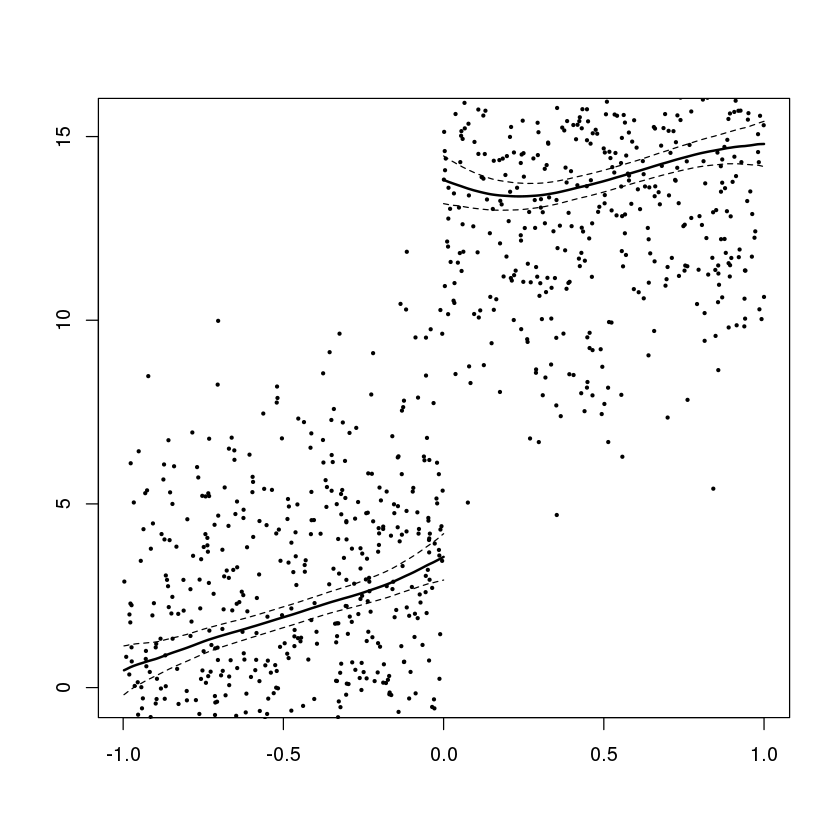

In [ ]:
library(rdd)

n <- 1000
set.seed(1)

x1<-runif(n,-1,1)
W<-(x1>=0) # the treatment

x2<-rnorm(n) # a second predictor


effect <- 10

y <- 3 + 2*x1 + 3*x2 + effect*W + rnorm(n)

fit.rd <- RDestimate(y~x1) # can also call with cutpoint=c. Defaults to cutpoint=0. This fits a local regresion on each side of the cutpoint.
summary(fit.rd) # it reports the "local average treatment effect" (LATE), and also robustness checks for smaller (half) and larger (double) bandwidth size for the local regression

plot(fit.rd) #this plots the results


Call:
RDestimate(formula = y ~ x1 | x2)

Type:
sharp 

Estimates:
           Bandwidth  Observations  Estimate  Std. Error  z value  Pr(>|z|)
LATE       0.6047      605          9.890     0.1887      52.42    0       
Half-BW    0.3023      305          9.895     0.2572      38.47    0       
Double-BW  1.2094     1000          9.947     0.1392      71.46    0       
              
LATE       ***
Half-BW    ***
Double-BW  ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

F-statistics:
           F     Num. DoF  Denom. DoF  p
LATE       5106  4         600         0
Half-BW    2495  4         300         0
Double-BW  9705  4         995         0


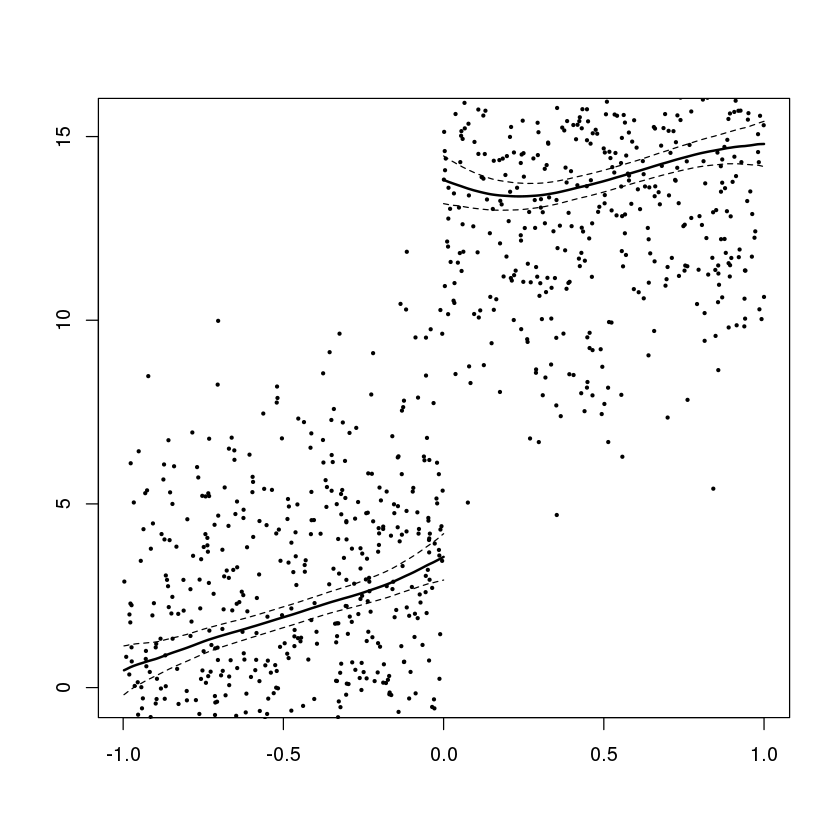

In [ ]:
# Efficiency gains can be made by including covariates
fit2.rd <-RDestimate(y~x1|x2) #include other coavariates, like x2
summary(fit2.rd)
plot(fit2.rd)

Note that the standard error has gone down a lot! This is because there has been a big reduction in variance of the residuals.